In [1]:
import numpy as np
from gillespy2 import (
    Model, Species, Parameter, Reaction, Event, \
                      EventTrigger, EventAssignment, RateRule, \
                      AssignmentRule, FunctionDefinition, SSACSolver, ODESolver
)


# Lotkavolterra_Oscillator-Stochastic

In [2]:
class LotkavolterraOscillatorStochastic(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Lotkavolterra_Oscillator-Stochastic")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="rabbit_birth_rate", expression="10"))
        self.add_parameter(Parameter(name="fox_birth_rate", expression="0.01"))
        self.add_parameter(Parameter(name="fox_death_rate", expression="10"))

        # Variables
        self.add_species(Species(name="rabbit", initial_value=1000, mode="discrete"))
        self.add_species(Species(name="fox", initial_value=1000, mode="discrete"))

        # Reactions
        self.add_reaction(Reaction(name="rabbit_birth", reactants={'rabbit': 1}, products={'rabbit': 2}, 
                                   rate="rabbit_birth_rate"))
        self.add_reaction(Reaction(name="fox_birth", reactants={'rabbit': 1, 'fox': 1}, products={'fox': 2}, 
                                   rate="fox_birth_rate"))
        self.add_reaction(Reaction(name="fox_death", reactants={'fox': 1}, products={}, 
                                   rate="fox_death_rate"))

        # Timespan
        self.timespan(np.linspace(0, 10, 1001))

In [3]:
model = LotkavolterraOscillatorStochastic()

# Simulation Parameters

In [4]:
def configure_simulation():
    solver = SSACSolver(model=model)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        "seed" : 10
    }
    return kwargs

In [5]:
kwargs = configure_simulation()
%time results = model.run(**kwargs)

CPU times: user 3.95 ms, sys: 2.29 ms, total: 6.24 ms
Wall time: 183 ms


# Visualization

In [6]:
results.plotplotly()

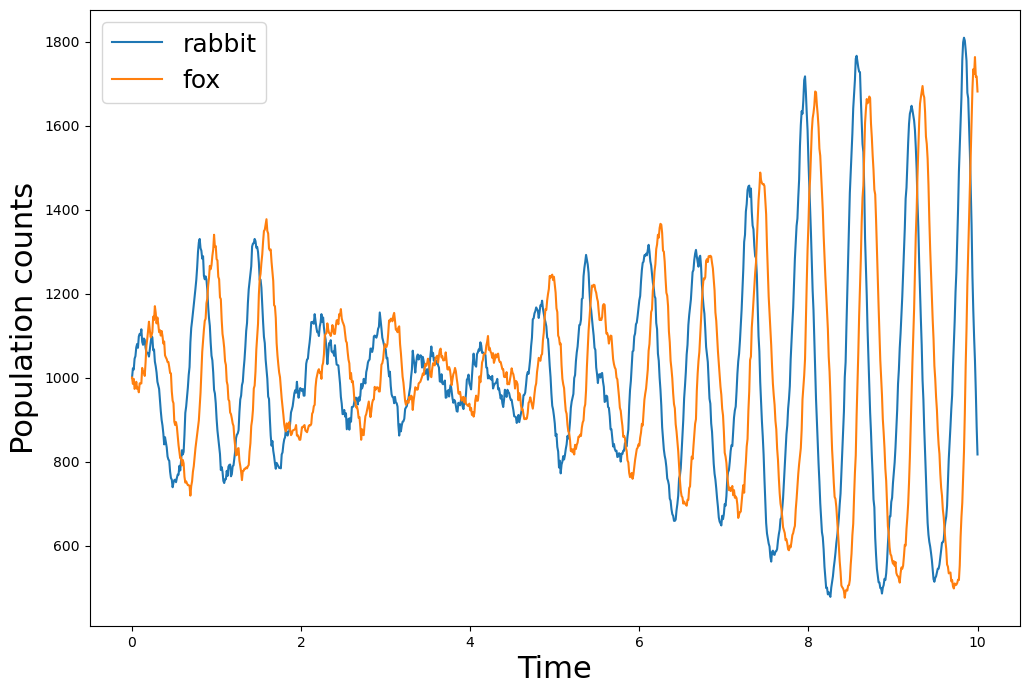

In [7]:
import matplotlib.pyplot as plt

results.plot(figsize=(12,8))
plt.legend(fontsize=18)
plt.ylabel('Population counts', fontsize=22)
plt.xlabel('Time', fontsize=22)
plt.savefig('GillesPy2_lotkavolterra_ex.pdf')

In [72]:
!xdg-open .

In [8]:
# repeat with ODE solver:
def configure_simulation():
    solver = ODESolver(model=model)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        #"seed" : 10
    }
    return kwargs


In [9]:
kwargs = configure_simulation()
%time results = model.run(**kwargs)

CPU times: user 11.7 ms, sys: 963 µs, total: 12.7 ms
Wall time: 13.5 ms


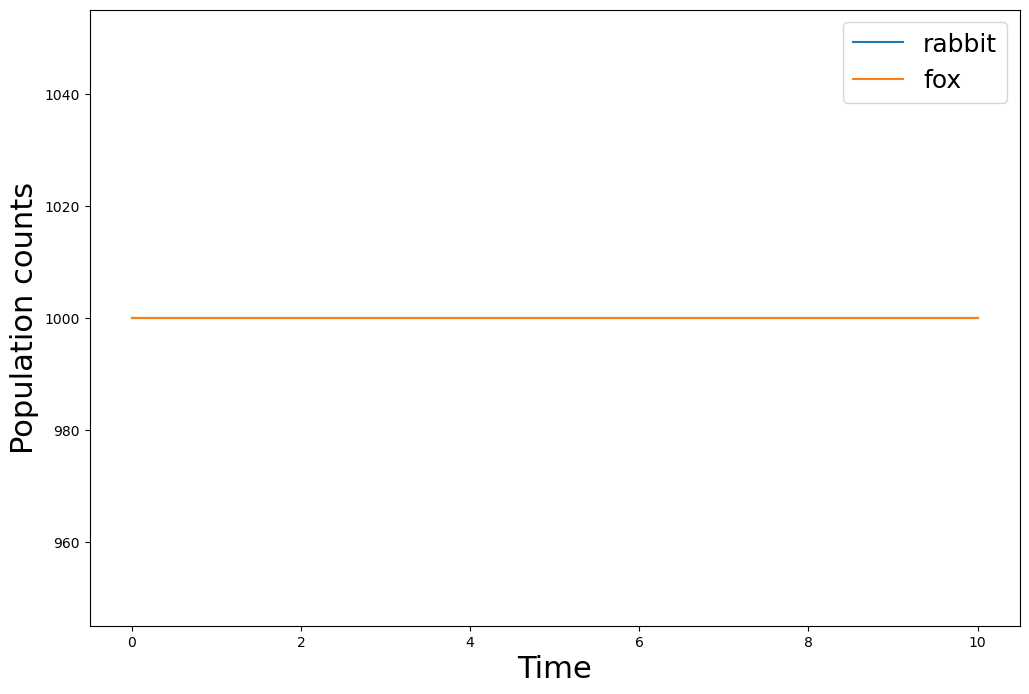

In [10]:
import matplotlib.pyplot as plt

results.plot(figsize=(12,8))
plt.legend(fontsize=18)
plt.ylabel('Population counts', fontsize=22)
plt.xlabel('Time', fontsize=22)
plt.savefig('GillesPy2_lotkavolterra_ex_ode.pdf')

In [11]:
# change model so that initial condition is not at ODE equilibrium (1000,1000)
# set initial fox pop to 700 instead of 1000
class LotkavolterraOscillatorStochastic2(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Lotkavolterra_Oscillator-Stochastic")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="rabbit_birth_rate", expression="10"))
        self.add_parameter(Parameter(name="fox_birth_rate", expression="0.01"))
        self.add_parameter(Parameter(name="fox_death_rate", expression="10"))

        # Variables
        self.add_species(Species(name="rabbit", initial_value=1000, mode="discrete"))
        self.add_species(Species(name="fox", initial_value=700, mode="discrete"))

        # Reactions
        self.add_reaction(Reaction(name="rabbit_birth", reactants={'rabbit': 1}, products={'rabbit': 2}, 
                                   rate="rabbit_birth_rate"))
        self.add_reaction(Reaction(name="fox_birth", reactants={'rabbit': 1, 'fox': 1}, products={'fox': 2}, 
                                   rate="fox_birth_rate"))
        self.add_reaction(Reaction(name="fox_death", reactants={'fox': 1}, products={}, 
                                   rate="fox_death_rate"))

        # Timespan
        self.timespan(np.linspace(0, 10, 1001))

model2 = LotkavolterraOscillatorStochastic2()

In [12]:
# repeat simulation code
def configure_simulation2():
    solver = ODESolver(model=model2)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        #"seed" : 10
    }
    return kwargs
kwargs2 = configure_simulation2()
%time results2 = model2.run(**kwargs2)

CPU times: user 27.9 ms, sys: 2.43 ms, total: 30.4 ms
Wall time: 30.2 ms


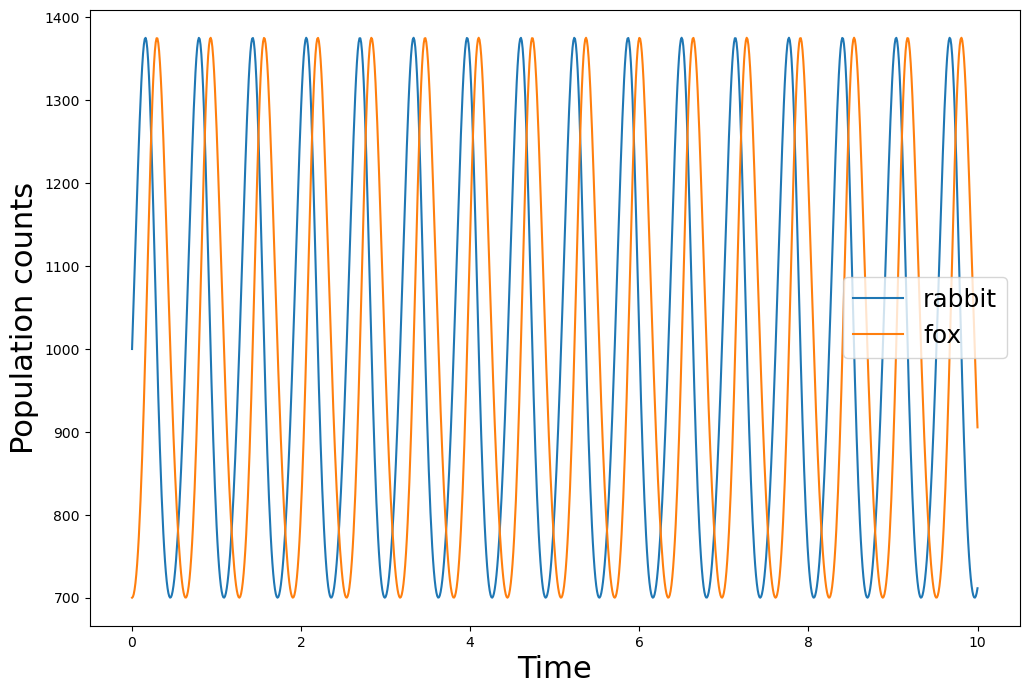

In [13]:
import matplotlib.pyplot as plt

results2.plot(figsize=(12,8))
plt.legend(fontsize=18)
plt.ylabel('Population counts', fontsize=22)
plt.xlabel('Time', fontsize=22)
plt.savefig('GillesPy2_lotkavolterra_ex_ode_nonequilibrium.pdf')